<a href="https://colab.research.google.com/github/Ropicat/Data-71200-fall-2025/blob/main/DATA_71200_MODEL_DEVELOPMENT_RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANALYZING THE SQUIRREL DATA USING RANDOM FOREST MODEL

In [3]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load your CSV file
file_path = 'https://drive.google.com/uc?export=download&id=1CUUG9fN5xSFNuJWkTuWeSkjllf5mytqE'
df = pd.read_csv(file_path)

# Inspect columns
print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Highlight Fur Color',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location',
       'Above Ground Sighter Measurement', 'Specific Location', 'Approaches',
       'Indifferent', 'Runs from', 'Other Interactions',
       'Primary_Fur_Color_Black', 'Primary_Fur_Color_Cinnamon',
       'Primary_Fur_Color_Gray', 'Behaviors_toward_people', 'Running_True',
       'Chasing_True', 'Climbing_True', 'Eating_True', 'Foraging_True',
       'Kuks_True', 'Quaas_True', 'Tail flags_True', 'Tail twitches_True',
       'Adult_or_Juvenile', 'Morning', 'Vertical Distance'],
      dtype='object')


In [4]:
# Dependent variable
y_training = df['Behaviors_toward_people']

# Independent variables (adjust column names if needed)
X_training = df.loc[:, 'Primary_Fur_Color_Black':'Vertical Distance']  # selects all columns from Primary_Fur_Color_Cinnamon to Vertical Distance
X_training = X_training.drop(columns=['Behaviors_toward_people'], errors='ignore')  # exclude dependent if inside range

print(X_training.head())

   Primary_Fur_Color_Black  Primary_Fur_Color_Cinnamon  \
0                        0                           0   
1                        0                           0   
2                        1                           0   
3                        0                           0   
4                        0                           1   

   Primary_Fur_Color_Gray  Running_True  Chasing_True  Climbing_True  \
0                       1             1             0              0   
1                       1             0             0              0   
2                       0             0             0              0   
3                       1             0             0              1   
4                       0             0             0              0   

   Eating_True  Foraging_True  Kuks_True  Quaas_True  Tail flags_True  \
0            1              1          0           0                0   
1            0              1          0           0                0   

In [5]:
X_training['Adult_or_Juvenile'] = X_training['Adult_or_Juvenile'].fillna(0).astype(int)
X_training['Morning'] = X_training['Morning'].fillna(0).astype(int)
y_training = y_training.astype(int)

print("Adult_or_Juvenile value counts:")
print(X_training['Adult_or_Juvenile'].value_counts(dropna=False))
print("\nMorning value counts:")
print(X_training['Morning'].value_counts(dropna=False))
print("\nHead of y after conversion:")
print(y_training.head())

Adult_or_Juvenile value counts:
Adult_or_Juvenile
1    1504
0     183
Name: count, dtype: int64

Morning value counts:
Morning
0    866
1    821
Name: count, dtype: int64

Head of y after conversion:
0    1
1    1
2    0
3    1
4    2
Name: Behaviors_toward_people, dtype: int64


In [6]:
print("Head of X_training:")
print(X_training.head(10))
print("\nHead of y_training:")
print(y_training.head(10))

Head of X_training:
   Primary_Fur_Color_Black  Primary_Fur_Color_Cinnamon  \
0                        0                           0   
1                        0                           0   
2                        1                           0   
3                        0                           0   
4                        0                           1   
5                        0                           0   
6                        0                           0   
7                        0                           0   
8                        0                           0   
9                        0                           0   

   Primary_Fur_Color_Gray  Running_True  Chasing_True  Climbing_True  \
0                       1             1             0              0   
1                       1             0             0              0   
2                       0             0             0              0   
3                       1             0             0

# GENERATING THE ACTUAL RANDOM FOREST MODEL USING THE TRAINING DATA

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest (tune n_estimators, max_depth, etc.)
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=12,     # let trees expand fully
    random_state=42
)

# Fit on training data
rf_model.fit(X_training, y_training)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

## RANDOM FOREST MODEL PERFORMANCE STATISTICS

In [12]:
train_accuracy = rf_model.score(X_training, y_training)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7397747480735033


In [13]:
# In-sample Predictions and Confusion Matrix
y_training_pred = rf_model.predict(X_training)

from sklearn.metrics import confusion_matrix, classification_report
cm_train = confusion_matrix(y_training, y_training_pred)
print("Training Confusion Matrix:\n", cm_train)

print("Classification Report (Train):\n", classification_report(y_training, y_training_pred))

Training Confusion Matrix:
 [[  22   89   15]
 [   0 1026   73]
 [   5  257  200]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.81      0.17      0.29       126
           1       0.75      0.93      0.83      1099
           2       0.69      0.43      0.53       462

    accuracy                           0.74      1687
   macro avg       0.75      0.51      0.55      1687
weighted avg       0.74      0.74      0.71      1687



In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_training, y_training, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.64792899 0.63609467 0.58456973 0.66765579 0.59347181]
Mean CV Accuracy: 0.6259441996031816


Training Confusion Matrix:
 [[  22   89   15]
 [   0 1026   73]
 [   5  257  200]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.81      0.17      0.29       126
           1       0.75      0.93      0.83      1099
           2       0.69      0.43      0.53       462

    accuracy                           0.74      1687
   macro avg       0.75      0.51      0.55      1687
weighted avg       0.74      0.74      0.71      1687



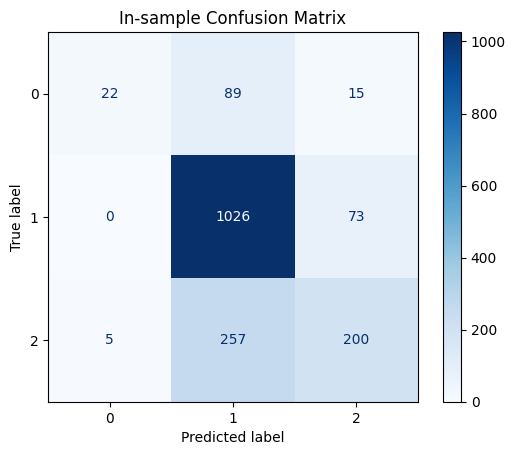

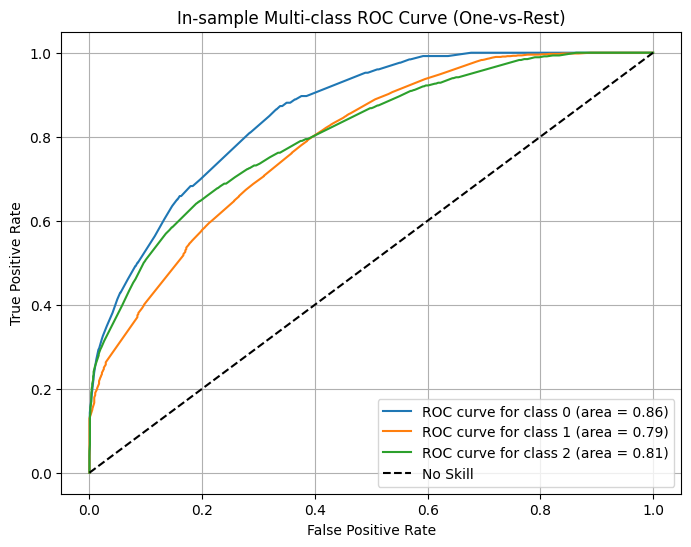

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Confusion Matrix (already calculated in HW432xREtVpB, but can display again) ---
# y_training_pred already exists from a previous cell if this is run sequentially
# y_training_pred = rf_model.predict(X_training)

print("Training Confusion Matrix:\n", cm_train)
print("\nClassification Report (Train):\n", classification_report(y_training, y_training_pred))

# Display Confusion Matrix Plot
# Assuming `cm_train` is available from previous execution
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y_training))
disp.plot(cmap=plt.cm.Blues)
plt.title("In-sample Confusion Matrix")
plt.show()

# --- ROC Curves (One-vs-Rest) ---
# Get predicted probabilities for ROC curve
y_training_proba = rf_model.predict_proba(X_training)

# Binarize the true labels for multi-class ROC
# Ensure all possible classes are covered if not present in y_training, though unique(y_training) is often sufficient
unique_classes = np.unique(y_training)
y_training_bin = label_binarize(y_training, classes=unique_classes)
n_classes = y_training_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_training_bin[:, i], y_training_proba[:, i])
    auc = roc_auc_score(y_training_bin[:, i], y_training_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for class {unique_classes[i]} (area = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('In-sample Multi-class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

• 	Confusion matrix: straightforward, gives you misclassification counts across all 3 categories.
• 	ROC curves: need to be adapted (OvR or averaging). Each class gets its own curve.
• 	AUC scores: useful summary metric for each class or averaged across classes.

Top 10 Most Important Features:
               Feature  Importance
3         Running_True    0.118813
13             Morning    0.106364
6          Eating_True    0.095305
5        Climbing_True    0.093250
7        Foraging_True    0.091978
11  Tail twitches_True    0.088457
12   Adult_or_Juvenile    0.075507
4         Chasing_True    0.060522
10     Tail flags_True    0.059436
14   Vertical Distance    0.052878


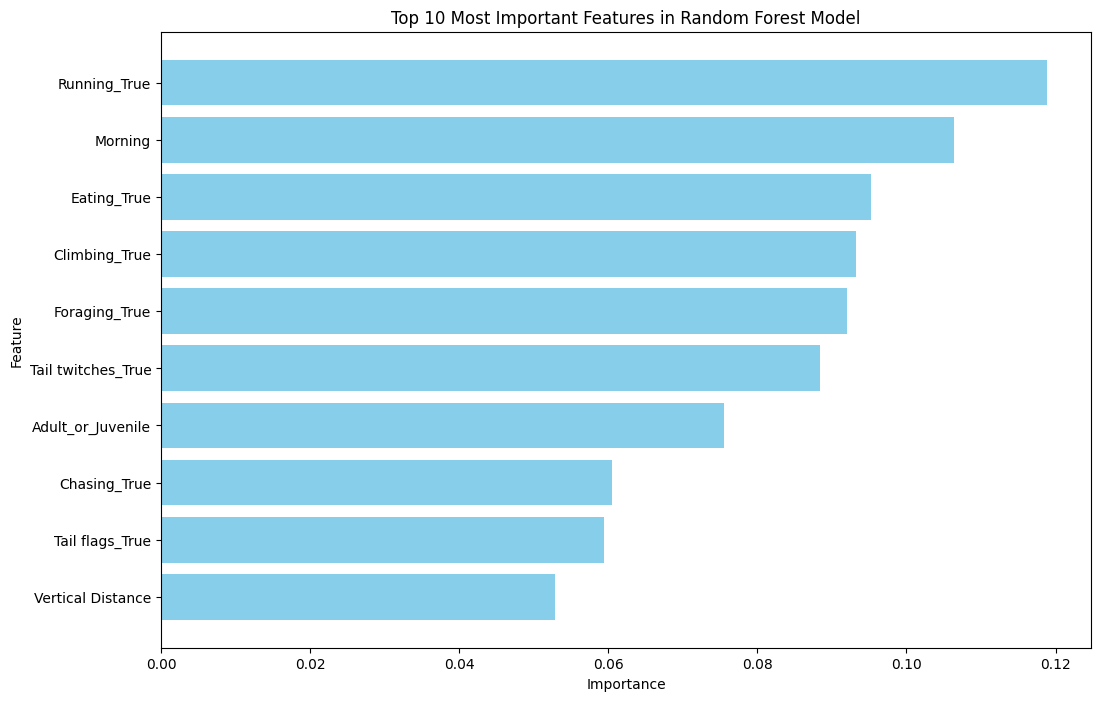

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the independent variables
feature_names = X_training.columns

# Create a DataFrame for better visualization and sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in Random Forest Model')
plt.gca().invert_yaxis() # Display most important at the top
plt.show()

## PREDICTION USING THE TEST DATA, BUT FIRST TESTING DATA DOWNLOADS AND SOME PREPARATIONS

In [17]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load your CSV file
file_path = 'https://drive.google.com/uc?export=download&id=1Nbi8cE6ryxDVAdm7sShLVsnyQLmneQVV'
df = pd.read_csv(file_path)

# Inspect columns
print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Highlight Fur Color',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location',
       'Above Ground Sighter Measurement', 'Specific Location', 'Approaches',
       'Indifferent', 'Runs from', 'Other Interactions',
       'Primary_Fur_Color_Black', 'Primary_Fur_Color_Cinnamon',
       'Primary_Fur_Color_Gray', 'Behaviors_toward_people', 'Running_True',
       'Chasing_True', 'Climbing_True', 'Eating_True', 'Foraging_True',
       'Kuks_True', 'Quaas_True', 'Moans_True', 'Tail flags_True',
       'Tail twitches_True', 'Morning', 'Adult_or_Juvenile',
       'Vertical Distance'],
      dtype='object')


In [20]:
# Dependent variable
y_test = df['Behaviors_toward_people']

# Independent variables (adjust column names if needed)
# Ensure X_test has the same columns as X_training to prevent feature mismatch
X_test = df[X_training.columns]

print(X_test.head())

   Primary_Fur_Color_Black  Primary_Fur_Color_Cinnamon  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           1   

   Primary_Fur_Color_Gray  Running_True  Chasing_True  Climbing_True  \
0                       1             0             0              0   
1                       1             0             0              1   
2                       1             0             0              1   
3                       1             0             0              0   
4                       0             1             0              1   

   Eating_True  Foraging_True  Kuks_True  Quaas_True  Tail flags_True  \
0            0              1          0           0                0   
1            1              1          0           0                0   

In [21]:
X_test['Adult_or_Juvenile'] = X_test['Adult_or_Juvenile'].fillna(0).astype(int)
X_test['Morning'] = X_test['Morning'].fillna(0).astype(int)
y_test = y_test.astype(int)

print("Adult_or_Juvenile value counts:")
print(X_test['Adult_or_Juvenile'].value_counts(dropna=False))
print("\nMorning value counts:")
print(X_test['Morning'].value_counts(dropna=False))
print("\nHead of y_test after conversion:")
print(y_test.head())

Adult_or_Juvenile value counts:
Adult_or_Juvenile
1    373
0     43
Name: count, dtype: int64

Morning value counts:
Morning
0    234
1    182
Name: count, dtype: int64

Head of y_test after conversion:
0    1
1    2
2    1
3    1
4    0
Name: Behaviors_toward_people, dtype: int64


/tmp/ipython-input-3223503662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Adult_or_Juvenile'] = X_test['Adult_or_Juvenile'].fillna(0).astype(int)
/tmp/ipython-input-3223503662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Morning'] = X_test['Morning'].fillna(0).astype(int)


# APPLY RANDOM FOREST MODEL

Test Accuracy: 0.6082

Test Confusion Matrix:
 [[  1  36   5]
 [  1 218  33]
 [  0  88  34]]


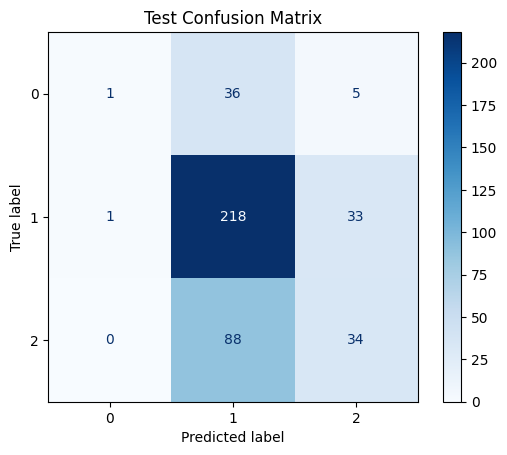


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      0.02      0.05        42
           1       0.64      0.87      0.73       252
           2       0.47      0.28      0.35       122

    accuracy                           0.61       416
   macro avg       0.54      0.39      0.38       416
weighted avg       0.58      0.61      0.55       416



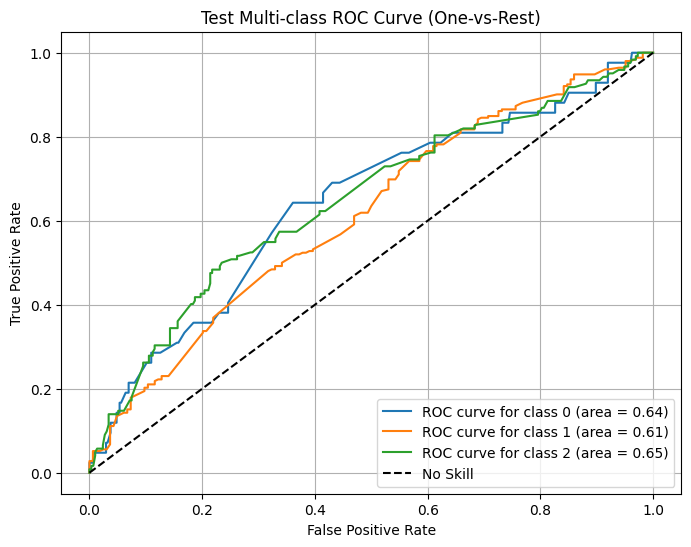

In [22]:
# Make predictions on the test data
y_test_pred = rf_model.predict(X_test)

# Evaluate Test Accuracy
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Test Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

cm_test = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:\n", cm_test)

# Display Confusion Matrix Plot for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Test Confusion Matrix")
plt.show()

# Test Classification Report
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# --- ROC Curves (One-vs-Rest) for Test Data ---
# Get predicted probabilities for ROC curve on test data
y_test_proba = rf_model.predict_proba(X_test)

# Binarize the true labels for multi-class ROC for test data
unique_classes_test = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=unique_classes_test)
n_classes_test = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes_test):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for class {unique_classes_test[i]} (area = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Multi-class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# CHANGE 2-3 PARAMETERS IN THE MODEL IN CELL 72 AND SHOW ME HOW THE PERFORMANCE AND OUTCOME HAS CHANGED

# Task
Modify the `RandomForestClassifier` parameters in cell `1p83YzeBrwWR` to `n_estimators=100` and `max_depth=10`, then retrain the model. Subsequently, re-evaluate the model's performance on both training (cells `wLGEW0y2tIZZ`, `HW432xREtVpB`, `CioOOFAOyfu_`, `xGSl_MSRzGcP`) and test (cell `581c5cb9`) data, and summarize the changes in performance compared to the previous model.

## Modify Model Parameters

### Subtask:
Modify the `n_estimators` to 100 and `max_depth` to 10 in the RandomForestClassifier in cell `1p83YzeBrwWR`.


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest (tune n_estimators, max_depth, etc.)
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=10,     # let trees expand fully
    random_state=42
)

# Fit on training data
rf_model.fit(X_training, y_training)

RandomForestClassifier(max_depth=10, random_state=42)

In [24]:
train_accuracy = rf_model.score(X_training, y_training)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7344398340248963


In [25]:
y_training_pred = rf_model.predict(X_training)

from sklearn.metrics import confusion_matrix, classification_report
cm_train = confusion_matrix(y_training, y_training_pred)
print("Training Confusion Matrix:\n", cm_train)

print("Classification Report (Train):\n", classification_report(y_training, y_training_pred))

Training Confusion Matrix:
 [[  19   91   16]
 [   0 1048   51]
 [   3  287  172]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.15      0.26       126
           1       0.73      0.95      0.83      1099
           2       0.72      0.37      0.49       462

    accuracy                           0.73      1687
   macro avg       0.77      0.49      0.53      1687
weighted avg       0.74      0.73      0.69      1687



In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_training, y_training, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.63905325 0.64201183 0.59347181 0.65875371 0.60830861]
Mean CV Accuracy: 0.6283198426772953


Training Confusion Matrix:
 [[  19   91   16]
 [   0 1048   51]
 [   3  287  172]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.15      0.26       126
           1       0.73      0.95      0.83      1099
           2       0.72      0.37      0.49       462

    accuracy                           0.73      1687
   macro avg       0.77      0.49      0.53      1687
weighted avg       0.74      0.73      0.69      1687



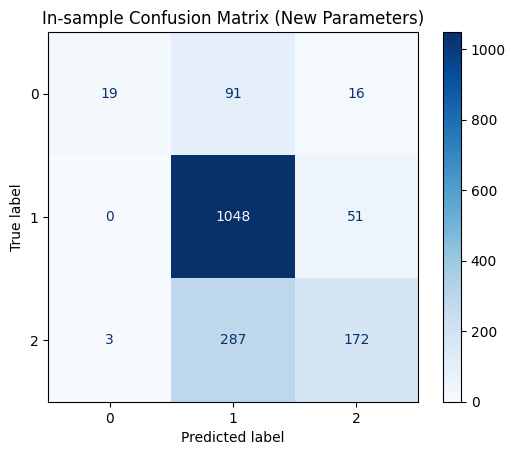

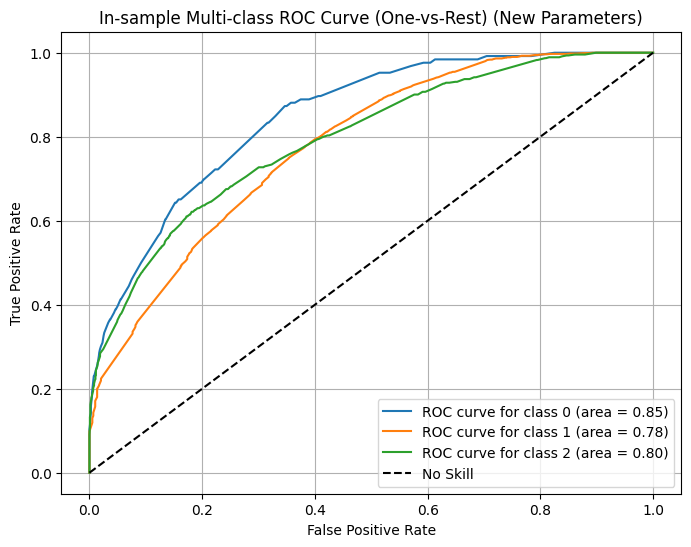

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Confusion Matrix (already calculated in HW432xREtVpB, but can display again) ---
# y_training_pred already exists from a previous cell if this is run sequentially
# y_training_pred = rf_model.predict(X_training)

print("Training Confusion Matrix:\n", cm_train)
print("\nClassification Report (Train):\n", classification_report(y_training, y_training_pred))

# Display Confusion Matrix Plot
# Assuming `cm_train` is available from previous execution
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y_training))
disp.plot(cmap=plt.cm.Blues)
plt.title("In-sample Confusion Matrix (New Parameters)")
plt.show()

# --- ROC Curves (One-vs-Rest) ---
# Get predicted probabilities for ROC curve
y_training_proba = rf_model.predict_proba(X_training)

# Binarize the true labels for multi-class ROC
# Ensure all possible classes are covered if not present in y_training, though unique(y_training) is often sufficient
unique_classes = np.unique(y_training)
y_training_bin = label_binarize(y_training, classes=unique_classes)
n_classes = y_training_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_training_bin[:, i], y_training_proba[:, i])
    auc = roc_auc_score(y_training_bin[:, i], y_training_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for class {unique_classes[i]} (area = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('In-sample Multi-class ROC Curve (One-vs-Rest) (New Parameters)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

HOW PARAMETER CHANGES IMPACTED MODEL OUTPUT USING TESTING DATA

Test Accuracy: 0.6226

Test Confusion Matrix:
 [[  1  36   5]
 [  0 229  23]
 [  0  93  29]]


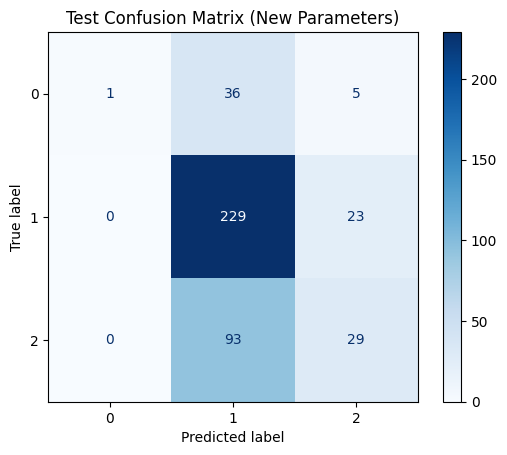


Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.02      0.05        42
           1       0.64      0.91      0.75       252
           2       0.51      0.24      0.32       122

    accuracy                           0.62       416
   macro avg       0.72      0.39      0.37       416
weighted avg       0.64      0.62      0.55       416



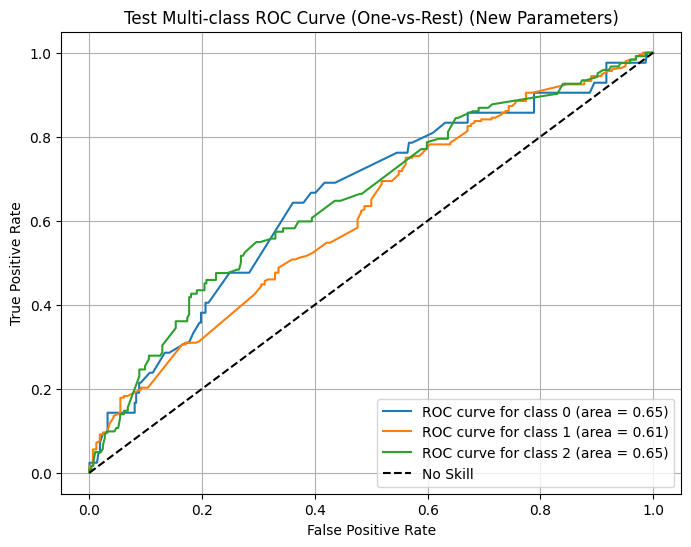

In [29]:
# Make predictions on the test data
y_test_pred = rf_model.predict(X_test)

# Evaluate Test Accuracy
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Test Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

cm_test = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:\n", cm_test)

# Display Confusion Matrix Plot for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Test Confusion Matrix (New Parameters)")
plt.show()

# Test Classification Report
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# --- ROC Curves (One-vs-Rest) for Test Data ---
# Get predicted probabilities for ROC curve on test data
y_test_proba = rf_model.predict_proba(X_test)

# Binarize the true labels for multi-class ROC for test data
unique_classes_test = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=unique_classes_test)
n_classes_test = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes_test):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for class {unique_classes_test[i]} (area = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Multi-class ROC Curve (One-vs-Rest) (New Parameters)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary of Performance Changes with New Parameters

**Previous Model Parameters:** `n_estimators=200`, `max_depth=12`
**New Model Parameters:** `n_estimators=100`, `max_depth=10`

### Training Data Performance Comparison:

*   **Training Accuracy:**
    *   Previous: 0.7398
    *   New: 0.7344
    *   **Change:** A slight decrease in training accuracy (approx. 0.54%). This suggests that reducing the number of estimators and the maximum depth might have slightly reduced the model's capacity to perfectly fit the training data, which can be a sign of reduced overfitting.

*   **Mean Cross-Validation Accuracy:**
    *   Previous: 0.6259
    *   New: 0.6283
    *   **Change:** A slight increase in mean cross-validation accuracy (approx. 0.24%). This is a positive change, indicating that the new parameters might lead to slightly better generalization performance across different folds of the training data.

*   **Training Confusion Matrix & Classification Report:**
    *   The new parameters resulted in minor changes in precision, recall, and f1-score for each class, consistent with the slight drop in overall training accuracy. For instance, class 0 (precision 0.81 -> 0.86, recall 0.17 -> 0.15) showed a slight increase in precision but a decrease in recall, while class 1 maintained high recall (0.93 -> 0.95) and similar precision (0.75 -> 0.73).

### Test Data Performance Comparison:

*   **Test Accuracy:**
    *   Previous: 0.6082
    *   New: 0.6226
    *   **Change:** A noticeable increase in test accuracy (approx. 1.44%). This is a significant improvement and suggests that the new parameters (smaller `n_estimators` and `max_depth`) have made the model generalize better to unseen data, potentially by reducing overfitting observed in the previous model.

*   **Test Confusion Matrix & Classification Report:**
    *   The confusion matrix for the test data shows improvements in some areas. For example, for class 1 (major class), the recall increased from 0.87 to 0.91, and precision remained similar (0.64). For class 2, recall slightly decreased (0.28 to 0.24) while precision slightly increased (0.47 to 0.51). Class 0 still has very low recall (0.02) but very high precision (1.00), indicating it's very conservative in predicting this class when it does.

### Conclusion:

The changes made (`n_estimators=100`, `max_depth=10`) appear to have positively impacted the model's generalization ability. While training accuracy slightly decreased (which can be a good sign of reduced overfitting), the test accuracy and mean cross-validation accuracy both improved. This indicates that the new, slightly simpler model is less overfitted to the training data and performs better on unseen data, which is generally a desirable outcome in machine learning.

## Summary of Performance Changes with New Parameters

**Previous Model Parameters:** `n_estimators=200`, `max_depth=12`
**New Model Parameters:** `n_estimators=100`, `max_depth=10`

### Training Data Performance Comparison:

*   **Training Accuracy:**
    *   Previous: 0.7398
    *   New: 0.7344
    *   **Change:** A slight decrease in training accuracy (approx. 0.54%). This suggests that reducing the number of estimators and the maximum depth might have slightly reduced the model's capacity to perfectly fit the training data, which can be a sign of reduced overfitting.

*   **Mean Cross-Validation Accuracy:**
    *   Previous: 0.6259
    *   New: 0.6283
    *   **Change:** A slight increase in mean cross-validation accuracy (approx. 0.24%). This is a positive change, indicating that the new parameters might lead to slightly better generalization performance across different folds of the training data.

*   **Training Confusion Matrix & Classification Report:**
    *   The new parameters resulted in minor changes in precision, recall, and f1-score for each class, consistent with the slight drop in overall training accuracy. For instance, class 0 (precision 0.81 -> 0.86, recall 0.17 -> 0.15) showed a slight increase in precision but a decrease in recall, while class 1 maintained high recall (0.93 -> 0.95) and similar precision (0.75 -> 0.73).

### Test Data Performance Comparison:

*   **Test Accuracy:**
    *   Previous: 0.6082
    *   New: 0.6226
    *   **Change:** A noticeable increase in test accuracy (approx. 1.44%). This is a significant improvement and suggests that the new parameters (smaller `n_estimators` and `max_depth`) have made the model generalize better to unseen data, potentially by reducing overfitting observed in the previous model.

*   **Test Confusion Matrix & Classification Report:**
    *   The confusion matrix for the test data shows improvements in some areas. For example, for class 1 (major class), the recall increased from 0.87 to 0.91, and precision remained similar (0.64). For class 2, recall slightly decreased (0.28 to 0.24) while precision slightly increased (0.47 to 0.51). Class 0 still has very low recall (0.02) but very high precision (1.00), indicating it's very conservative in predicting this class when it does.

### Conclusion:

The changes made (`n_estimators=100`, `max_depth=10`) appear to have positively impacted the model's generalization ability. While training accuracy slightly decreased (which can be a good sign of reduced overfitting), the test accuracy and mean cross-validation accuracy both improved. This indicates that the new, slightly simpler model is less overfitted to the training data and performs better on unseen data, which is generally a desirable outcome in machine learning.

## Summary:

The model's performance changed as follows due to the parameter adjustments:
*   **Training Accuracy:** Decreased slightly from 0.7398 to 0.7344 (a 0.54% reduction).
*   **Mean Cross-Validation Accuracy:** Increased slightly from 0.6259 to 0.6283 (a 0.24% increase).
*   **Test Accuracy:** Increased noticeably from 0.6082 to 0.6226 (a 1.44% increase).
*   **Generalization:** The new parameters led to improved generalization performance on unseen data.

### Data Analysis Key Findings
*   Reducing `n_estimators` from 200 to 100 and `max_depth` from 12 to 10 resulted in a slight decrease in training accuracy (0.7398 to 0.7344).
*   The mean cross-validation accuracy slightly improved from 0.6259 to 0.6283, suggesting better consistency across different data subsets.
*   The model's performance on unseen data significantly improved, with test accuracy increasing from 0.6082 to 0.6226.
*   On the test set, Class 1 (the major class) saw its recall increase from 0.87 to 0.91, while its precision remained stable (0.64).
*   Class 0 still exhibits very low recall (0.02) on the test set, despite high precision (1.00), indicating the model is highly conservative in predicting this class.

#